In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=df["label"]

In [5]:
df1=df.drop("label",axis=1)

In [6]:
df1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

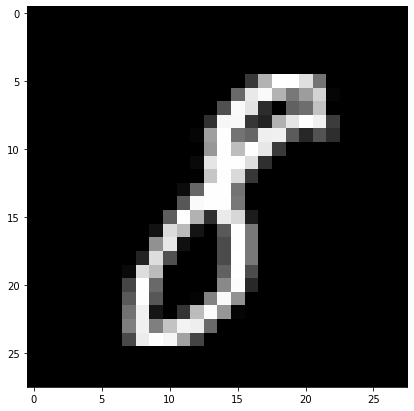

8


In [8]:
plt.figure(figsize=(7,7))
idx=5000
Grid_data=df1.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(Grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

2D Visualization Using PCA(step by step):

In [9]:
#Data Preprocessing: Standardization
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(df1)

In [10]:
standardized_data.shape

(42000, 784)

In [11]:
#Calculate Covariance Matrix of this standardized dataset(X^T*X)
covar_matrix=np.matmul(standardized_data.T,standardized_data)


In [12]:
covar_matrix.shape

(784, 784)

In [13]:
#Compute eigen values and eigen vectors of covariance matrix
from scipy.linalg import eigh

values,vectors=eigh(covar_matrix, eigvals=(782,783))


In [14]:
vectors.shape

(784, 2)

In [15]:
#Reverse the vector shape for computational purpose
vectors=vectors.T

In [16]:
vectors.shape

(2, 784)

In [17]:
#Projecting my sample data on the plane formed by the two principal eigen vectors by vector-vector multiplication
new_coordinates=np.matmul(vectors,standardized_data.T)

In [18]:
new_coordinates.shape

(2, 42000)

In [19]:
#Add label to the data and converting it to a data frame
new_coordinates=np.vstack((new_coordinates,l)).T
df2=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))

In [20]:
df2.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


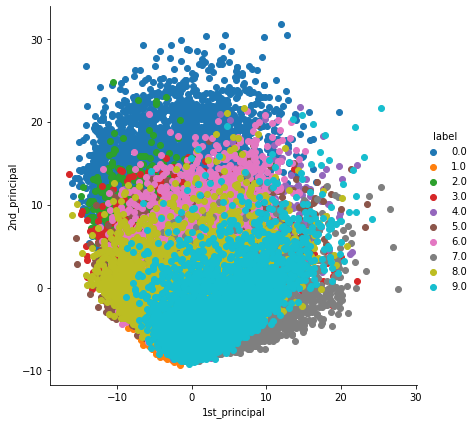

In [21]:
#plotting
sns.FacetGrid(df2,hue="label",height=6) \
   .map(plt.scatter,"1st_principal","2nd_principal") \
   .add_legend()
plt.show()

PCA Using Scikit Learn:

In [22]:
from sklearn import decomposition

In [23]:
pca=decomposition.PCA()

In [24]:
pca.n_components=2
pca_data=pca.fit_transform(df1)

In [25]:
pca_data.shape

(42000, 2)

In [26]:
pca_data=np.vstack((pca_data.T,l)).T
df3=pd.DataFrame(pca_data,columns=("1st_principal","2nd_principal","label"))

In [27]:
df3.head()

,1st_principal,2nd_principal,label
0,-661.593893,-699.416664,1.0
1,1701.452162,-360.602457,0.0
2,-886.895264,-293.724001,1.0
3,-165.755166,300.178093,4.0
4,1923.710913,-449.198914,0.0


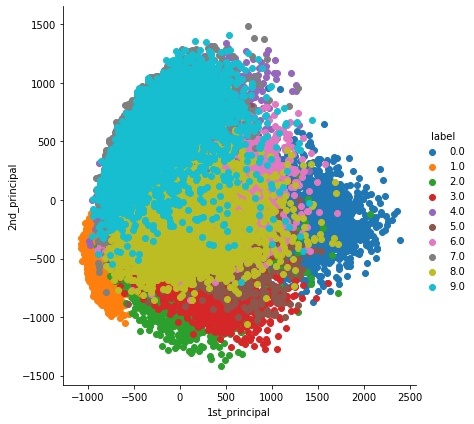

In [28]:
sns.FacetGrid(df3,hue="label",height=6) \
   .map(plt.scatter,"1st_principal","2nd_principal") \
   .add_legend()
plt.show()

PCA for Dimentionality Reduction(Not Visualization):

In [29]:
pca.n_components=784
pca_data1=pca.fit_transform(df1)

In [30]:
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)

In [31]:
cum_var_explained=np.cumsum(percentage_var_explained)

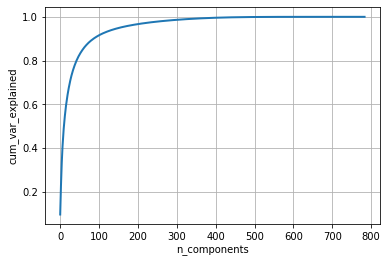

In [32]:
#Plot the PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cum_var_explained")
plt.show()

Visualization using t-SNE:

In [33]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
#Default perplexity is 30
#Default number of iteration is 1000

In [34]:
tsne_data=model.fit_transform(standardized_data)

In [35]:
tsne_data.shape

(42000, 2)

In [36]:
tsne_data=np.vstack((tsne_data.T,l)).T


In [37]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("1_dim","2_dim","labels"))

In [41]:
tsne_df.head()

,1_dim,2_dim,labels
0,-42.785000,-34.266109,1.0
1,11.892769,49.377197,0.0
2,-61.297367,1.487621,1.0
3,19.714920,-59.510265,4.0
4,18.415829,56.934116,0.0


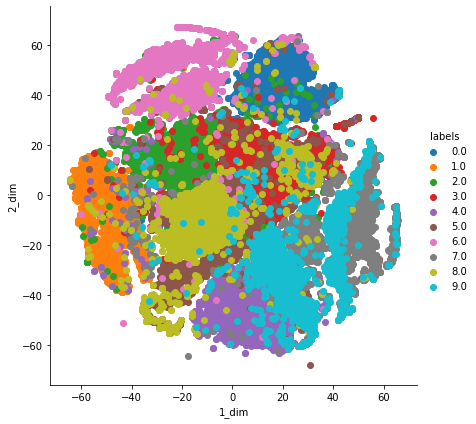

In [42]:
sns.FacetGrid(data=tsne_df,hue="labels",height=6) \
   .map(plt.scatter,"1_dim","2_dim") \
   .add_legend()
plt.show()

In [43]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

In [ ]:
tsne_data1=model.fit_transform(standardized_data)